# DS310 Group_Project Optional 1
#### By Zekun Peng and Cong Ma

In [1]:
# data analysis, splitting and wrangling
import pandas as pd
import numpy as np
from scipy import stats
import unicodecsv as csv


# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# remove warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Owner/Desktop/DS300/AB_NYC_2019.csv") 
df= data.copy()

# Dataset analysis

First We Take a look about the data information and try to analysis it. 
* By using the ```df.info()```, we are able to list all the column name and identify the type of information of each column. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

As the information shows above, there are **6 string column**
* **String column**: ```{name, host_name, neighbourhood_group, neighbourhood, room_type, last_review}```

there are **10 numeric column, 3 using float and 7 using integer.**
* **Integer column**: ```{id, host_id, price, minimum_nights, number_of_reviews,calculated_host_listings_count,availability_365}```
* **float Column**: ```{latitude, longitude, reviews_per_month}```

### present the basic descriptives

By using Pandas ```Dataframe.describe()``` method, we are able to show some basic statistical details like **percentile, mean, std etc.** of numeric values columns. But first we need to carefully select the column to make sure every **statistical** we generate form the column is **meaningful**. 
* Thus we want to train the data that are **qulitative** and **discrete**. 
* which includes columns：```{"price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"}```
* ```{longitude, latitude}``` are consider the **ratio** and **dementional**, Hence are not using in the data.

In [4]:
df[["price","minimum_nights","number_of_reviews","reviews_per_month",
    "calculated_host_listings_count","availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


For this project, our **main goal** is to <u>release an anonymization data that prevent personal information leaks and able to help others **understand the true quality of each rentals.**</u>
* After discussion we would like to keep the **data untility** of column ```{"price", "minimum_nights", "number_of_reviews", "availability_365"}```, since these column contain the **information that relevant to needs for the intended prediction** of the room general quality.
* Also base on the information we have above we rise another quesiton: Why is ```availability_365``` column have more than **25% of 0 value element**. We decide to take a deeper analysis on this column.

In [5]:
not_available=df[df.availability_365 == 0]
not_available.shape

(17533, 16)

this means **17533 data have 0 avaliability** for the future booking of airbnb. These data will be consider as the outliers and **droped** from the dataframe. 
* We also consider adding these data back by changing the availability then re-enter as **noise**. However these data will lower the **accuracy** of the true price information. We currently didn't apply and just **drop** these value in the next step.

In [6]:
df = df[df.availability_365 != 0]
df = df[df.price != 0]
df[["price","minimum_nights","number_of_reviews","reviews_per_month",
    "calculated_host_listings_count","availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31354.000000,31354.000000,31354.000000,26147.000000,31354.000000,31354.000000
mean,162.091822,8.338426,31.849365,1.810063,10.335460,175.834439
std,254.444750,23.838961,51.638559,1.805657,40.705488,126.195374
min,10.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,70.000000,2.000000,2.000000,0.450000,1.000000,55.000000
50%,112.000000,3.000000,10.000000,1.230000,1.000000,168.000000
75%,189.000000,5.000000,39.000000,2.680000,3.000000,305.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* After we drop all the zero from the dataset, we decide to drop all the **Null Value** using ```df.dropna()``` method in side data set and use ```df.boxplot()``` method to keep analysis on the number of outliers.

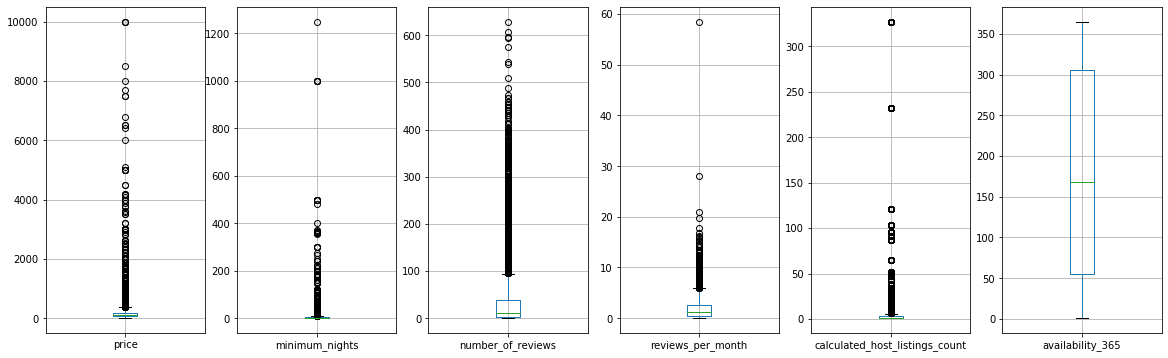

In [7]:
fig, ax = plt.subplots(1, 6, figsize=(20, 6))
df.boxplot('price', ax=ax[0])
df.boxplot('minimum_nights', ax=ax[1])
df.boxplot('number_of_reviews', ax=ax[2])
df.boxplot('reviews_per_month', ax=ax[3])
df.boxplot('calculated_host_listings_count', ax=ax[4])
df.boxplot('availability_365', ax=ax[5])

Base on the **Boxplot**, We are able to visually recognize **every outliers** base on each individual numeric column. After discussion, we decide to use **Z-Score** and **IQR** to help us drop all the outliers from the data. This procedure was operated later in **Development of An Anonymization Approach**.

# Identification of Privacy sensitive Information

Identify the explicit identifiers, quasi-identifiers, sensitive attributes and non-sensitive attributes. 

**Explicit identifiers:**  ```{'id','host_id','name','host_name'} ```

>Reason: This kind of identifier allow us to classify an individual **directly or specifically**. The ```id``` can directly linked to one specific household, and the ```host_id``` and ```host_name```can directly link to a specific household owner. We suggest that ```name``` is too unique for the 

**Quasi-identifiers:** ```{'neighbourhood_group', 'neighbourhood','latitude', 'longitude'}```

>Reason: Based on the definition of QI, it said that those identifiers that do not uniquely identify an individual in most cases but can in some instances or when combined with other quasi-identifiers. 
Those attributes cannot directly linked to one specific record in this dataset. However, if we combine some of those data, we will figure out which one is the exactly record.
Since ```neighbourhood_group, neighbourhood, 'latitude', 'longitude'``` provide geographical information that able to identify the location of the specfic household, they are QI.

**Sensitive attributes:** ``` {'price', 'calculated_most_listings_count'}```

>Reason: Those records are sensitive, ```price``` contain all the financial information of household, ```calculated_most_listings_count``` able to tell the number of people that are with you together. 

**Non-sensitive attributes:** ```{'minimum_nights','room_type', 'number_of_reviews', 'last_review', 'reviews_per_month', 'availability_365'}```

>Reason: 
```'minimum_nights','room_type', 'number_of_reviews', 'last_review', 'reviews_per_month' and 'availability_365'``` are column that didn't contain a financial information, they are available to the public for the selection of the house rental.


# Development of An Anonymization  Approach

As we mentioned before, our **main goal** is to <u>release an anonymization data that prevent personal information leaks and able to help others **understand the true quality of each rentals.**</u> 
so we want to drop every outliers in the data to make sure data can **generate proporate information**
* Our **first step** is to manipulate and remove all the numeric column outliers from the ```dataframe```
* K-anonymity will apply **Suppression** and remove all the **Explicit Identifiers**. Also since we are only working with **numeric** column that are **qulitative** and **discrete**. Thus we will first drop column ```{"id", "host_id","latitude","longitude"}```

In [8]:
df.drop(columns=["id", "host_id","latitude","longitude",], inplace=True) # dropped because unique for every row

In [9]:
df.drop(columns=["number_of_reviews","reviews_per_month"], inplace=True) # dropped because unique for every row

Next, we calculate **IQR**, figure out the range from **Q1 minus 1.5 IQR** to **Q3 plus 2 IQR**, and then delete everything that are outside of this range.

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                             119.0
minimum_nights                      3.0
calculated_host_listings_count      2.0
availability_365                  250.0
dtype: float64


In [11]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.describe()

,price,minimum_nights,calculated_host_listings_count,availability_365
count,22664.000000,22664.000000,22664.000000,22664.000000
mean,125.123544,2.559875,1.692420,155.523297
std,73.242413,1.598944,1.146446,122.492414
min,10.000000,1.000000,1.000000,1.000000
25%,70.000000,1.000000,1.000000,42.000000
50%,100.000000,2.000000,1.000000,130.000000
75%,165.000000,3.000000,2.000000,270.000000
max,367.000000,9.000000,6.000000,365.000000


In [12]:
df_out.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,2018-10-19,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,2019-05-21,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150,3,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,2019-07-05,1,194
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,2019-06-22,1,129


In [13]:
df_out.shape

(22664, 10)

We originally have **48895** entries. After applying the outlier formula, we remain **23622** entries. 
* Now data data frame **df_out** contain all the column with index that are consider **not an outliers**. Thus we will create a new dataframe by using method ```data.iloc``` to generate a new dataframe called **train**
* we will then drop all the ```NULL``` values from **train** dataframe and apply the anonymization process

In [14]:
train = data.iloc[df_out.index]
train.dropna(inplace=True)
train.shape

(20191, 16)

We start to applying <u>**k-anonymization**</u> here. 
* Firstly, we apply <u>**suppression**</u> to the dataset by remove all the explicit identifiers. which contain column ```{'id','host_id'} ```
* We consider the ```longitude``` and ```latitude``` as a very important **sensitive data**. Since the informaiton it generate by combine them together can directly identify the house hold location. Hence we will drop them as well.
* Column ```name``` and ```host_name``` also are **unique** information for every row that can lead to personal information. Hence also removed.


In [15]:
train.drop(columns=["id",'name', "host_id",'host_name',"latitude",
                    "longitude"], inplace=True) # dropped because unique for every row

In [16]:
train.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000
mean,123.764549,2.531078,43.758259,2.033443,1.707394,155.684761
std,72.092748,1.555419,57.852440,1.812268,1.152796,121.546095
min,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,69.000000,1.000000,6.000000,0.650000,1.000000,43.000000
50%,100.000000,2.000000,21.000000,1.560000,1.000000,132.000000
75%,160.000000,3.000000,59.000000,2.980000,2.000000,269.000000
max,367.000000,9.000000,629.000000,20.940000,6.000000,365.000000


Next we use <u>**randomization**</u> method by randomly assigning numbers to unique labels of each column.
* Here, the method that we choose is ```'LabelEncoder'``` to assign **random numeric labels** for each string **quasi-identifiers** and string **sensitive column**.

In [17]:
train.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
loc=train["neighbourhood_group"].astype('str') 
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Embraked_label = Encoder.fit_transform(loc)
train["group_label"] = Embraked_label

In [19]:
train[['neighbourhood_group','group_label']].tail()

,neighbourhood_group,group_label
48782,Manhattan,2
48790,Queens,3
48799,Staten Island,4
48805,Bronx,0
48852,Brooklyn,1


As Shown above, each of the unique location in column ```neighbourhood_group``` have been assign a new numeric value.

Next we want to remain the untility connection between different ```neighbourhood``` and it's ```neighbourhood_group```, Thus we are going to create a sub_dataframe called ```subtrain```

* we will drop all the duplicates and reset index, thus we will have a dataset that only contain all the list of unique connection between neighbor and neighborhood group

In [20]:
sub_train = train.copy()
sub_train = sub_train[['group_label','neighbourhood']]
sub_train = sub_train.drop_duplicates()
sub_train = sub_train.reset_index(drop=True)
sub_train.head()

,group_label,neighbourhood
0,1,Kensington
1,2,Midtown
2,1,Clinton Hill
3,2,Murray Hill
4,2,Hell's Kitchen


Now we want to rank different neighbourhood base on what group it have. For example, since **Kensington** is from **Brooklyn** (which is **group_label 1**), it will ranked as 1. **Clinton Hill** also from **Brooklyn**, it will rank as 2. Thus we will retain the connection.

In [21]:
sub_train['neighbourhood_label'] = sub_train.groupby('group_label')['group_label'].rank(method='first').astype(int)
sub_train.head()

,group_label,neighbourhood,neighbourhood_label
0,1,Kensington,1
1,2,Midtown,1
2,1,Clinton Hill,2
3,2,Murray Hill,2
4,2,Hell's Kitchen,3


In [22]:
train=train.merge(sub_train,on=['group_label','neighbourhood'], how='left')

We drop the original columns called ```'neighbourhood'``` and ```'neighbourhood_group'```. 

In [23]:
train.drop(columns=["neighbourhood",'neighbourhood_group'], inplace=True) # dropped because unique for every row

In [24]:
train.head()

,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,group_label,neighbourhood_label
0,Private room,149,1,9,2018-10-19,0.21,6,365,1,1
1,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,1
2,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,2
3,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2,2
4,Private room,79,2,430,2019-06-24,3.47,1,220,2,3


Next, we apply the **generalizaiton**,
* We use the method called ```pd.qcut``` to divid this **quasi-identifiers** into **5** intervals that holds relativly equal amount of entries. 
> Why we are doing this is because directly apply <u>**K-anonymity**</u> and <u>**l-diversity**</u> on this data set is very diffcult. The data is **complex, large and high demantional**. 

* So our solution is try to devide the quasi-identifer column in to equal amount of record then after the combination we will have a data with sufficition anonymity and diversity.

In [25]:
train['neighbourhood_interval'] = pd.qcut(train['neighbourhood_label'], 5)
train[['neighbourhood_interval','neighbourhood_label']].groupby(['neighbourhood_interval'], as_index=False).count()

,neighbourhood_interval,neighbourhood_label
0,"(0.999, 4.0]",4241
1,"(4.0, 8.0]",5934
2,"(8.0, 11.0]",3063
3,"(11.0, 15.0]",2931
4,"(15.0, 51.0]",4022


Next, we apply the **generalizaiton** to column ```price``` and ```number_of_reviews```:
> Why we are doing this is because we want to also apply <u>**l-diversity**</u> to the dataset. price and review count are too unique for the diversity. Thus we will generalize to interval to keep diversity.

* We use the method called ```pd.qcut``` to divid all **quasi-identifiers** into **8** intervals that holds relativly equal amount of entries. 

In [26]:
train['price_split'] = pd.qcut(train['price'], 8)
train[['price_split','price']].groupby(['price_split'], as_index=False).count()

,price_split,price
0,"(9.999, 52.0]",2547
1,"(52.0, 69.0]",2542
2,"(69.0, 85.0]",2704
3,"(85.0, 100.0]",2551
4,"(100.0, 129.0]",2290
5,"(129.0, 160.0]",2584
6,"(160.0, 210.0]",2507
7,"(210.0, 367.0]",2466


In [27]:
train['review_split'] = pd.qcut(train['number_of_reviews'], 8)
train[['review_split','number_of_reviews']].groupby(['review_split'], as_index=False).count()

,review_split,number_of_reviews
0,"(0.999, 3.0]",3293
1,"(3.0, 6.0]",1863
2,"(6.0, 12.0]",2563
3,"(12.0, 21.0]",2463
4,"(21.0, 35.0]",2492
5,"(35.0, 59.0]",2543
6,"(59.0, 103.0]",2462
7,"(103.0, 629.0]",2512


As the result Shows Above:
* The ```price``` column have been divide in to **8 interval** with around **2500 record** in each region. 
* The ```number_of_reviews``` have been **8 interval** with around **2000 record** in each region.

> We want to use these generaliation to 

Then We drop the orginal columns ```"price"``` and ```"number_of_reviews"```

We drop the orginal columns called "price' and 'number_of_reviews'.

In [28]:
train.drop(columns=["price"], inplace=True)
train.drop(columns=["number_of_reviews"], inplace=True)# dropped because unique for every row

Now we apply <u>**Differential Privacy**</u>:
* ```'last_review'``` column is a string column contain unique date information, Hence we are gonna manipulate the information.
* First we split the ```'last_review'``` column in to 3 new column ```{'Year','Month','Day'}```

In [29]:
train[['Year','Month','Day']] = train["last_review"].str.split("-", n = 2, expand = True).astype(int)

Then we decrease the ```Month``` column by 1.
> We only want to **decrease by 1** is because some people will use last review date as a important **infomation to evaluate** the location. Thus we are trying to keep the data as close to the original data as possible.

We also make sure that if the **month was January** before (now month will become zero since we already minus). it will set back to **last year's December.**

In [30]:
train['Month']=train['Month']-1

In [31]:
train.Month[train.Month == 0] = 12
train.Year[train.Month == 0] -= 1
train.Month.unique()

array([ 9,  4,  6,  5, 12,  8,  2,  3,  7, 10, 11,  1], dtype=int64)

Last we combined the **manipulated results** of ```'Year'``` and ```'Month'``` columns into the new column called ```'last_review_data'``` and compare with ```'last_review'``` column. 

In [32]:
train["last_review_date"]=train["Year"].astype('str')+"-"+train["Month"].astype('str')

In [33]:
train[['last_review','last_review_date']].head()

,last_review,last_review_date
0,2018-10-19,2018-9
1,2019-05-21,2019-4
2,2019-07-05,2019-6
3,2019-06-22,2019-5
4,2019-06-24,2019-5


Since we finished manipulated all the result, We drop all useless columns ```{'last_review','Year','Month','Day'} ```

In [34]:
train.drop(columns=["last_review","Year","Month","Day"], inplace=True) # dropped because unique for every row

In [35]:
train.head()

,room_type,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,group_label,neighbourhood_label,neighbourhood_interval,price_split,review_split,last_review_date
0,Private room,1,0.21,6,365,1,1,"(0.999, 4.0]","(129.0, 160.0]","(6.0, 12.0]",2018-9
1,Entire home/apt,1,0.38,2,355,2,1,"(0.999, 4.0]","(210.0, 367.0]","(35.0, 59.0]",2019-4
2,Entire home/apt,1,4.64,1,194,1,2,"(0.999, 4.0]","(85.0, 100.0]","(103.0, 629.0]",2019-6
3,Entire home/apt,3,0.59,1,129,2,2,"(0.999, 4.0]","(160.0, 210.0]","(59.0, 103.0]",2019-5
4,Private room,2,3.47,1,220,2,3,"(0.999, 4.0]","(69.0, 85.0]","(103.0, 629.0]",2019-5


In [36]:
train.head()

,room_type,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,group_label,neighbourhood_label,neighbourhood_interval,price_split,review_split,last_review_date
0,Private room,1,0.21,6,365,1,1,"(0.999, 4.0]","(129.0, 160.0]","(6.0, 12.0]",2018-9
1,Entire home/apt,1,0.38,2,355,2,1,"(0.999, 4.0]","(210.0, 367.0]","(35.0, 59.0]",2019-4
2,Entire home/apt,1,4.64,1,194,1,2,"(0.999, 4.0]","(85.0, 100.0]","(103.0, 629.0]",2019-6
3,Entire home/apt,3,0.59,1,129,2,2,"(0.999, 4.0]","(160.0, 210.0]","(59.0, 103.0]",2019-5
4,Private room,2,3.47,1,220,2,3,"(0.999, 4.0]","(69.0, 85.0]","(103.0, 629.0]",2019-5


As the informaion shows above, The dataset is still use the **original index numbers**, thus we use method to ```reset_index``` and **sort** the rows and columns. 

In [37]:
df_train = train.reset_index(drop=True)
df_train = train [['group_label', 'neighbourhood_interval', 'price_split', 'review_split', 'room_type', 'minimum_nights', 'calculated_host_listings_count',
                        'availability_365','last_review_date']]

In [38]:
df_train.head()

,group_label,neighbourhood_interval,price_split,review_split,room_type,minimum_nights,calculated_host_listings_count,availability_365,last_review_date
0,1,"(0.999, 4.0]","(129.0, 160.0]","(6.0, 12.0]",Private room,1,6,365,2018-9
1,2,"(0.999, 4.0]","(210.0, 367.0]","(35.0, 59.0]",Entire home/apt,1,2,355,2019-4
2,1,"(0.999, 4.0]","(85.0, 100.0]","(103.0, 629.0]",Entire home/apt,1,1,194,2019-6
3,2,"(0.999, 4.0]","(160.0, 210.0]","(59.0, 103.0]",Entire home/apt,3,1,129,2019-5
4,2,"(0.999, 4.0]","(69.0, 85.0]","(103.0, 629.0]",Private room,2,1,220,2019-5


Before we finallized the data, we want to make a check about the Anonymization of the data:
* Base on the information below, each combination of the two quasi-identifer will have at least **17** data.
* Thus we have **k=17** Anonymization achieved.

In [39]:
check=train.groupby(['group_label', 'neighbourhood_interval'])['room_type'].count()
check.min()

17

In [40]:
check=train.groupby(['group_label', 'neighbourhood_interval'])['calculated_host_listings_count'].count()
check.min()

17

* For the diversity, unfortunately, since we only have 3 different room types. the maximum diversity we will have is l=3.
* Base on the minimum unique element in each combination of quasi-identifer, we achieved **l=2** diversity.

In [41]:
check=train.groupby(['group_label', 'neighbourhood_interval'])['room_type'].nunique()
check.min()

2

Finally we export the data to CSV for the future use.

In [46]:
df_train.to_csv("Anonymization_Airbnb.csv", index=False)

# Analysis of  Utility Loss

Firstly, we remove all explicit identifiersIncluding column ```{'id','host_id','name','host_name'} ``` in order to achieve K-anonymization. This prevent the user to identify the specific house hold and it's owner.

On the other hand, we use label encoder to change the quasi-identifer to numeric. Although we still try to remain the connection between the quasi-identifer, the Untility is still lost.

* For example: if we use the original data, we are able to use ```groupby``` method to clearly understand the specific informtion of unique room type base on certain neighbourhood from certain group. 

In [42]:
check=data.groupby(['neighbourhood_group',"neighbourhood"])['room_type'].unique()
check.head()

neighbourhood_group  neighbourhood
Bronx                Allerton                      [Entire home/apt, Private room]
                     Baychester                    [Entire home/apt, Private room]
                     Belmont          [Private room, Shared room, Entire home/apt]
                     Bronxdale        [Entire home/apt, Private room, Shared room]
                     Castle Hill                   [Entire home/apt, Private room]
Name: room_type, dtype: object

In [43]:
check=df_train.groupby(['group_label', 'neighbourhood_interval'])['room_type'].unique()
check.head()

group_label  neighbourhood_interval
0            (0.999, 4.0]                           [Private room, Entire home/apt]
             (4.0, 8.0]                [Private room, Entire home/apt, Shared room]
             (8.0, 11.0]                            [Entire home/apt, Private room]
             (11.0, 15.0]              [Private room, Entire home/apt, Shared room]
             (15.0, 51.0]              [Private room, Entire home/apt, Shared room]
Name: room_type, dtype: object

* However, if we use the ```df_train``` data we generate. we will only able see the room type form a range of neighbourhood and we can't understand which neighbour is which. 

Also another huge untility loss is the basic descriptives (range of values, mean, frequencies, outliers or unique values, etc) ability of the original data 
* For example: we can generate all the mean from the original data base on individual need. We can also compare a price from certain place with the mean to make perdiction and analysis on the information. 

In [44]:
fin=data[['neighbourhood_group',"neighbourhood",'price','number_of_reviews']].groupby(['neighbourhood_group',"neighbourhood"], as_index=False).mean()
fin.head()

,neighbourhood_group,neighbourhood,price,number_of_reviews
0,Bronx,Allerton,87.595238,42.928571
1,Bronx,Baychester,75.428571,44.285714
2,Bronx,Belmont,77.125000,12.333333
3,Bronx,Bronxdale,57.105263,24.105263
4,Bronx,Castle Hill,63.000000,13.111111


However base on the informaiton we have, we can only tell the amount of house hold which provide rental at a certain place. In the end we have lots huge amount of utility.

In [45]:
fin=df_train[['group_label','price_split','review_split']].groupby(['group_label','price_split'], as_index=False).count()
fin=fin.rename(columns={"review_split": "count"})
fin.head(15)

,group_label,price_split,count
0,0,"(9.999, 52.0]",234
1,0,"(52.0, 69.0]",127
2,0,"(69.0, 85.0]",108
3,0,"(85.0, 100.0]",74
4,0,"(100.0, 129.0]",55
5,0,"(129.0, 160.0]",43
6,0,"(160.0, 210.0]",14
7,0,"(210.0, 367.0]",15
8,1,"(9.999, 52.0]",1182
9,1,"(52.0, 69.0]",1200
